In [1]:
from qvd import qvd_reader
from pandasai import SmartDataframe
from pandasai.llm import OpenAI

In [2]:
from dotenv import load_dotenv
import os
# OpenAI Api Key
load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")

In [3]:
# Import the QVD file
df = qvd_reader.read('Precio_venta.qvd')
df

,Planta,Pais,Cliente,Periodo,Producto,Ventas(ADT),Ingresos,Devoluciones
0,Nueva Aldea,China,ZHEJIANG WELBON PULP,2021005,BKP,508.82,-447634.4,4476.34
1,Arauco,China,ZHEJIANG WELBON PULP,2021006,BKP,3730.4839999999995,-3446141.2600000002,34461.409999999996
2,Nueva Aldea,China,ZHEJIANG WELBON PULP,2021006,BKP,4960.603,-4621408.67,46214.079999999994


In [5]:
import pandas as pd
def convert_dtypes(df):
  cols = df.columns
  for c in cols:
      try:
          df[c] = pd.to_numeric(df[c])
      except:
          pass

convert_dtypes(df)

In [6]:
df.dtypes

Planta           object
Pais             object
Cliente          object
Periodo           int64
Producto         object
Ventas(ADT)     float64
Ingresos        float64
Devoluciones    float64
dtype: object

In [7]:
# LLM de OpenAI
llm = OpenAI(
  api_token=api_key,
  engine="gpt-3.5-turbo",
  temperature=0)
# Pandas AI
bot = SmartDataframe(df, config={"llm": llm})

In [8]:
bot.chat("¿Cuál fue la planta con más ventas y en qué periodo?")

'La planta con más ventas fue Nueva Aldea en el periodo 2021006.'

In [13]:
bot.chat("Dime cuál fue la máxima venta")

'The maximum sale was 4960.603.'

In [10]:
# 1m 31.2s
bot.chat("Valor máximo de Ventas a qué Planta pertenece")

<string>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


'The maximum value of Ventas belongs to Nueva Aldea.'

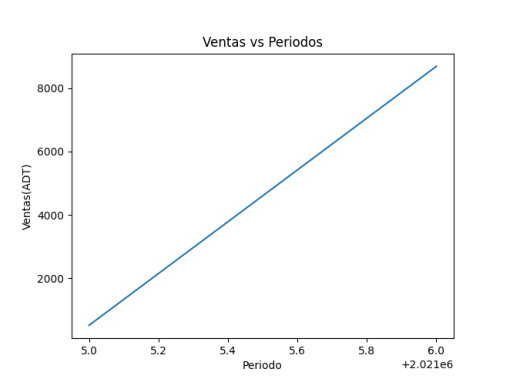

In [11]:
# 1m 28.8s
bot.chat("Grafica ventas vs periodos")